In [4]:
import pandas as pd
from darts import TimeSeries
from sklearn.model_selection import TimeSeriesSplit

In [5]:
target_columns = [
    'Temperature','Precipitation_accumulated','Humidity', 'Wind_Speed_kmh',
    'Soil_Moisture', 'Soil_Temperature', 'Wind_Dir_Sin', 'Wind_Dir_Cos'
]

df = pd.read_csv("../data/ground_station_clean.csv")

In [6]:
df['Timestamp']

0       2024-06-01 00:00:00
1       2024-06-01 01:00:00
2       2024-06-01 02:00:00
3       2024-06-01 03:00:00
4       2024-06-01 04:00:00
               ...         
8304    2025-05-13 00:00:00
8305    2025-05-13 01:00:00
8306    2025-05-13 02:00:00
8307    2025-05-13 03:00:00
8308    2025-05-13 04:00:00
Name: Timestamp, Length: 8309, dtype: object

In [7]:
tscv = TimeSeriesSplit(n_splits=3)
for fold, (train_idx, val_idx) in enumerate(tscv.split(df)):
    train_df_fold, val_df_fold = df.iloc[train_idx], df.iloc[val_idx]
    train_fold = TimeSeries.from_dataframe(train_df_fold, time_col="Timestamp", value_cols=target_columns, freq='1h')
    val_fold = TimeSeries.from_dataframe(val_df_fold, time_col="Timestamp", value_cols=target_columns, freq='1h')
    train_period = (train_df_fold['Timestamp'].iloc[0], train_df_fold['Timestamp'].iloc[-1])
    val_period = (val_df_fold['Timestamp'].iloc[0], val_df_fold['Timestamp'].iloc[-1])
    print(f"  Treino: {train_period[0]} até {train_period[1]}")
    print(f"  Validação: {val_period[0]} até {val_period[1]}\n")

  Treino: 2024-06-01 00:00:00 até 2024-08-26 13:00:00
  Validação: 2024-08-26 14:00:00 até 2024-11-21 02:00:00

  Treino: 2024-06-01 00:00:00 até 2024-11-21 02:00:00
  Validação: 2024-11-21 03:00:00 até 2025-02-15 15:00:00

  Treino: 2024-06-01 00:00:00 até 2025-02-15 15:00:00
  Validação: 2025-02-15 16:00:00 até 2025-05-13 04:00:00



In [8]:
tscv = TimeSeriesSplit(n_splits=5)
for fold, (train_idx, val_idx) in enumerate(tscv.split(df)):
    train_df_fold, val_df_fold = df.iloc[train_idx], df.iloc[val_idx]
    train_fold = TimeSeries.from_dataframe(train_df_fold, time_col="Timestamp", value_cols=target_columns, freq='1h')
    val_fold = TimeSeries.from_dataframe(val_df_fold, time_col="Timestamp", value_cols=target_columns, freq='1h')
    train_period = (train_df_fold['Timestamp'].iloc[0], train_df_fold['Timestamp'].iloc[-1])
    val_period = (val_df_fold['Timestamp'].iloc[0], val_df_fold['Timestamp'].iloc[-1])
    print(f"  Treino: {train_period[0]} até {train_period[1]}")
    print(f"  Validação: {val_period[0]} até {val_period[1]}\n")

  Treino: 2024-06-01 00:00:00 até 2024-07-28 20:00:00
  Validação: 2024-07-28 21:00:00 até 2024-09-24 12:00:00

  Treino: 2024-06-01 00:00:00 até 2024-09-24 12:00:00
  Validação: 2024-09-24 13:00:00 até 2024-11-21 04:00:00

  Treino: 2024-06-01 00:00:00 até 2024-11-21 04:00:00
  Validação: 2024-11-21 05:00:00 até 2025-01-17 20:00:00

  Treino: 2024-06-01 00:00:00 até 2025-01-17 20:00:00
  Validação: 2025-01-17 21:00:00 até 2025-03-16 12:00:00

  Treino: 2024-06-01 00:00:00 até 2025-03-16 12:00:00
  Validação: 2025-03-16 13:00:00 até 2025-05-13 04:00:00



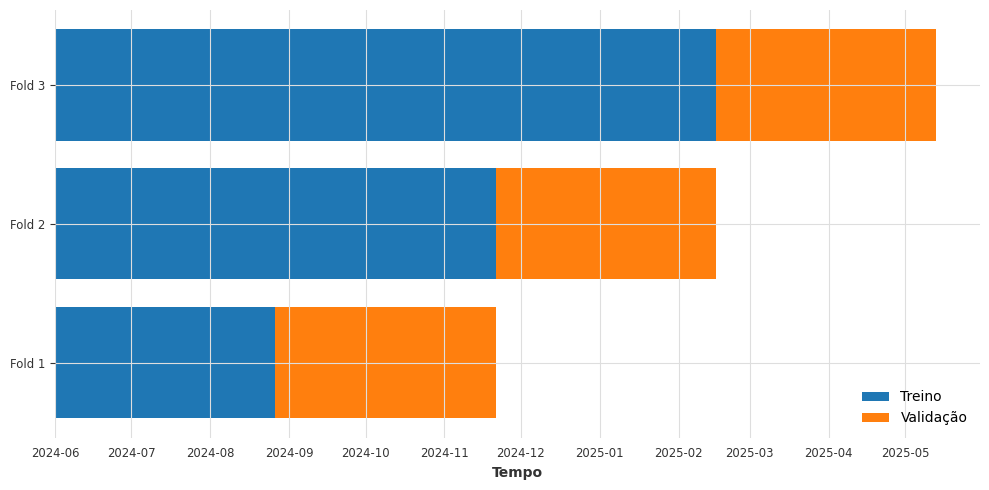

In [9]:
import matplotlib.pyplot as plt

def plot_tscv_periods(df, n_splits, time_col="Timestamp"):
    tscv = TimeSeriesSplit(n_splits=n_splits)
    fig, ax = plt.subplots(figsize=(10, 2 + n_splits))
    for fold, (train_idx, val_idx) in enumerate(tscv.split(df)):
        train_start = df[time_col].iloc[train_idx[0]]
        train_end = df[time_col].iloc[train_idx[-1]]
        val_start = df[time_col].iloc[val_idx[0]]
        val_end = df[time_col].iloc[val_idx[-1]]
        ax.barh(f"Fold {fold+1}", pd.to_datetime(train_end) - pd.to_datetime(train_start), left=pd.to_datetime(train_start), color="tab:blue", label="Treino" if fold==0 else "")
        ax.barh(f"Fold {fold+1}", pd.to_datetime(val_end) - pd.to_datetime(val_start), left=pd.to_datetime(val_start), color="tab:orange", label="Validação" if fold==0 else "")
    ax.set_xlabel("Tempo")
    ax.legend()
    plt.tight_layout()
    plt.show()

# Para n_splits=3
plot_tscv_periods(df, n_splits=3)

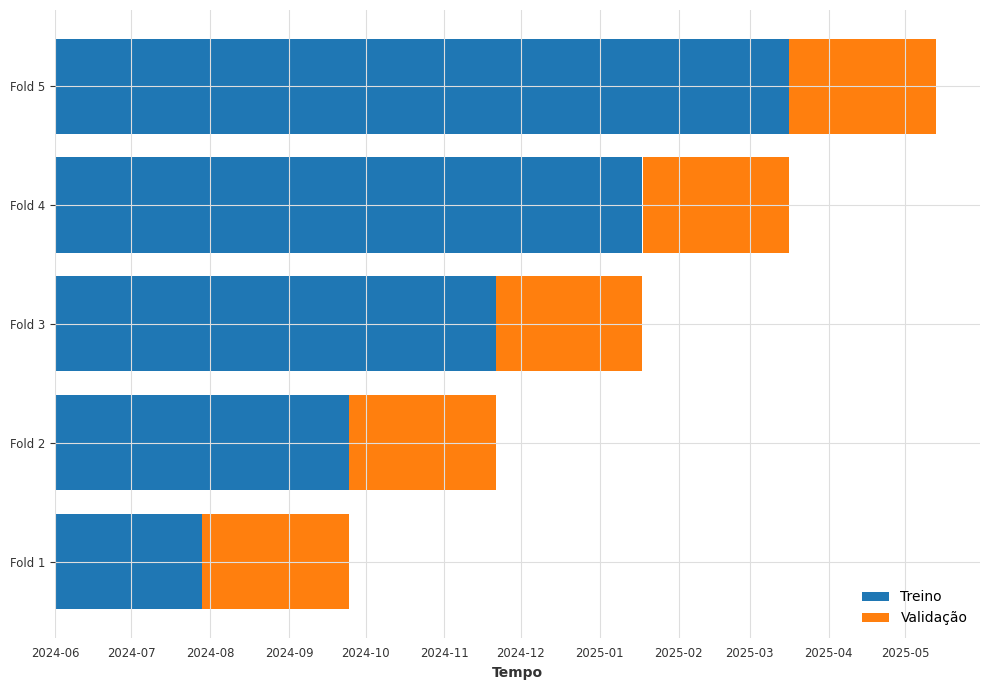

In [10]:
plot_tscv_periods(df, n_splits=5)